Prepare solution to build ticketing system there by using json file as your primary datasource (Text corpus with other metadata in it). 
Step 1: Group data into five categories namely Banking services, loans, Fraudalent reporting, Card, others.
Step 2: From step 1 create labeled dataset and utilize it to train supervised model like logistic regression, decision tree or random forest.


Above excercise should follow these steps -
Load Data
Text Preprocessing
EDA
Feature Extraction
Topic Modelling (Unsupervised)
Model building using Supervised learning
Model Training and evaluation
Inference


In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import re
import nltk, spacy, string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import json
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from pprint import pprint
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import NMF
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

nlp = spacy.load("en_core_web_sm")

C:\Users\vibha_chauhan\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vibha_chauhan\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vibha_chauhan\Anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vibha_chauhan\Anaconda3\envs\py37\lib\site-

In [2]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500

In [3]:
#Read data

df = pd.read_json("C:/Users/vibha_chauhan/Downloads/Assignment1/Assignment1/Client_data.json",orient='records')

In [4]:
#Checking the dataset as we get from the json

df.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint_id': '3211475', 'issue': 'Attempts to collect debt not owed', 'date_received': '2019-04-13T12:00:00-05:00', 'state': 'CA', 'consumer_disputed': 'N/A', 'product': 'Debt collection', 'company_response': 'Closed with explanation', 'company': 'JPMORGAN CHASE & CO.', 'submitted_via': 'Web', 'date_sent_to_company': '2019-04-13T12:00:00-05:00', 'company_public_response': None, 'sub_product': 'Credit card debt', 'timely': 'Yes', 'complaint_what_happened': '', 'sub_issue': 'Debt is not yours', 'consumer_consent_provided': 'Consent not provided'}"
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX', 'complaint_id': '3229299', 'issue': 'Written notification about debt', 'date_received': '2019-05-01T12:00:00-05:00', 'state': 'GA', 'consumer_disputed': 'N/A', 'product': 'Debt collection', 'company_response': 'Closed with explanation', 'company': 'JPMORGAN CHASE & CO.', 'submitted_via': 'Web', 'date_sent_to_company': '2019-05-01T12:00:00-05:00', 'company_public_response': None, 'sub_product': 'Credit card debt', 'timely': 'Yes', 'complaint_what_happened': 'Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. In 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. I have a right to know this information as a consumer. Chase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.'..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint_id': '3199379', 'issue': 'Other features, terms, or problems', 'date_received': '2019-04-02T12:00:00-05:00', 'state': 'TX', 'consumer_disputed': 'N/A', 'product': 'Credit card or prepaid card', 'company_response': 'Closed with explanation', 'company': 'JPMORGAN CHASE & CO.', 'submitted_via': 'Web', 'date_sent_to_company': '2019-04-02T12:00:00-05:00', 'company_public_response': None, 'sub_product': 'General-purpose credit card or charge card', 'timely': 'Yes', 'complaint_what_happened': 'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.', 'sub_issue': 'Problem with rewards from credit card', 'consumer_consent_provided': 'Consent provided'}"
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint_id': '2673060', 'issue': 'Trouble during payment process', 'date_received': '2017-09-13T12:00:00-05:00', 'state': 'MI', 'consumer_disputed': 'N/A', 'product': 'Mortgage', 'company_response': 'Closed with explanation', 'company': 'JPMORGAN CHASE & CO.', 'submitted_via': 'Web', 'date_sent_to_company': '2017-09-14T12:00:00-05:00', 'company_public_response': None, 'sub_product': 'Conventional home mortgage', 'timely': 'Yes', 'complaint_what_happened': '', 'sub_issue': None, 'consumer_consent_provided': 'Consent not provided'}"
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint_id': '3203545', 'issue': 'Fees or interest', 'date_received': '2019-04-05T12:00:00-05:00', 'state': 'NY', 'consumer_disputed': 'N/A', 'product': 'Credit card or prepaid card', 'company_response': 'Closed with explanation', 'company': 'JPMORGAN CHASE & CO.', 'submitted_via': 'Referral', 'date_sent_to_company': '2019-04-05T12:00:00-05:00', 'company_public_response': None, 'sub_product': 'General-purpose credit card or charge card', 'timely': 'Yes', 'complaint_what_happened': '', 'sub_issue': 'Charged too much interest', 'consumer_consent_

In [5]:
#Shape of the dataset

df.shape

(78313, 5)

In [6]:
#Normalizing and joining the dataset as the source column contains dictionary, poping out the original _source column

df = df.join(pd.json_normalize(df.pop('_source')))

In [7]:
#look at the dataset

df.head()

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [8]:
#Info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _index                     78313 non-null  object
 1   _type                      78313 non-null  object
 2   _id                        78313 non-null  int64 
 3   _score                     78313 non-null  int64 
 4   tags                       10900 non-null  object
 5   zip_code                   71556 non-null  object
 6   complaint_id               78313 non-null  object
 7   issue                      78313 non-null  object
 8   date_received              78313 non-null  object
 9   state                      76322 non-null  object
 10  consumer_disputed          78313 non-null  object
 11  product                    78313 non-null  object
 12  company_response           78313 non-null  object
 13  company                    78313 non-null  object
 14  submit

In [9]:
#Checking the columns

df.columns

Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [10]:
#Choosing only the necessary columns

df_=df[['product','sub_product','complaint_what_happened']]

In [11]:
#Check new dataset

df_.head()

,product,sub_product,complaint_what_happened
0,Debt collection,Credit card debt,
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.
3,Mortgage,Conventional home mortgage,
4,Credit card or prepaid card,General-purpose credit card or charge card,


In [12]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product                  78313 non-null  object
 1   sub_product              67742 non-null  object
 2   complaint_what_happened  78313 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [13]:
#Renaming the columns

df_ = df_.rename(columns={'complaint_what_happened': 'Complaint', 'product': 'Category','sub_product': 'Sub_Category' })

In [14]:
#Replacing blank comments with Nan

df_ = df_.replace(r'^\s*$', np.nan, regex=True)

In [15]:
df_

,Category,Sub_Category,Complaint
0,Debt collection,Credit card debt,NaN
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.
3,Mortgage,Conventional home mortgage,NaN
4,Credit card or prepaid card,General-purpose credit card or charge card,NaN
...,...,...,...
78308,Checking or savings account,Checking account,NaN
78309,Credit card or prepaid card,General-purpose credit card or charge card,"On Wednesday, XX/XX/XXXX I called Chas, my XXXX XXXX Visa Credit Card provider, and asked how to make a claim under their purchase protection benefit. On XX/XX/XXXX, I purchased three high school textbooks for my XXXX year old daughter because she transferred to a new school. All three books were damaged when a water bottle in her backpack broke. The Chase representative assured me the textbooks would be covered and instructed me to file a claim at XXXX. I immediately went to the website and filed the claim, including uploading all of the requested paperwork which included a copy of my credit card statement, copies of the three receipts and photographic evidence of the damage. The website even had "" books '' as one of the catagories I could list as the type of item they cover and that I could make a claim on. After following up repeatedly on my claim since the insurance provider failed to "" review my information and contact me within 5 business days to outline the next steps of the..."
78310,Checking or savings account,Checking account,"I am not familiar with XXXX pay and did not understand the great risk this provides to consumers. I believed this to be safe as it was through my Chase bank app. I have been with Chase for almost 20 years and trust their mobile banking and now am sadly regretful. I am being told to deal with the merchant except the merchant has refused to answer my inquiries and now shut down communication. The website of the said merchant looks entirely legitamite and is even using the faces of highly successful brands with individuals linked to their social media without their consent. In performing research of the phone number and other associated information available through PI it is very clear this merchant is continually creating new account title holders to perpetuate this cycle of fraud. Furthermore as this is a non fixed voip being used I believe they are fraudulently using the identity of the real XXXX XXXX Chase Bank told me they wouldnt even investigate, report this to XXXX or allow me..."
78311,Credit card or prepaid card,General-purpose credit card or charge card,"I have had flawless credit for 30 yrs. I've had Chase credit cards, "" Chase Freedom '' specifically since XXXX with no problems ever. I've done many balance transfers in my life, so I have plenty of experience. I recently did a balance transfer with Chase Freedom for {$9000.00} ( did many with other Chase cards, but apparently not "" Freeedom '' ) When I got my first bill, my minimum payment was {$470.00}. I was SHOCKED. I immediately called on XX/XX/XXXX. The representative told me that the min payment was so high bc they were making me pay the "" Balance transfer 

In [16]:
#Dropping missing values

df_.dropna(inplace=True)

In [17]:
#Checking shape of the dataset

df_.shape

(18963, 3)

In [18]:
df_['Complaint']=df_['Complaint'].astype(str)

In [19]:
#Cleaning Text- removing X, making it in lower case, removing text in square brackets, removing punctuations, removing words containing numbers

df_['Complaint'] = df_['Complaint'].str.replace('X', '')

def cleantext(complaint):
    complaint=complaint.lower()
    complaint=re.sub(r'\[.*?\]',"",complaint)
    complaint=re.sub(r'\w*\d\w*',"",complaint)
    complaint=re.sub(r'[%s]'% re.escape(string.punctuation),"",complaint)
    return complaint

df_['Complaint']=df_['Complaint'].apply(lambda x:cleantext(x))

In [20]:
#Lemmatize Text

def lemmatize_text(complaint):
    sent=[]
    doc=nlp(complaint)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_['Lemmatized_Complaint']= df_.apply(lambda x:lemmatize_text(x['Complaint']),axis=1)

In [21]:
#Removing stop words

stop = stopwords.words('english')
df_['Lemmatized_Complaint'] = df_['Lemmatized_Complaint'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
df_

,Category,Sub_Category,Complaint,Lemmatized_Complaint
1,Debt collection,Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account thanks in advance for your help,good morning name I appreciate could help I put stop chase bank cardmember service I write chase ask debt verification send I statement acceptable I ask bank validate debt instead I receive mail every month attempt collect debt I right know information consumer chase account thank advance help
2,Credit card or prepaid card,General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,I upgrade card tell agent upgrade anniversary date would change turn agent give I wrong information order upgrade account change anniversary date without consent recording agent mislead I
10,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant
11,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on...,try book ticket I come across offer apply towards ticket I apply reward card I put information offer within less minute notify via screen decision could make I immediately contact refer chase bank I immediately contact chase bank within get notification screen I tell chase representative I speak application deny could state I ask information offer explain even I approve credit offer gets apply first account statement could use purchase ticket I explicitly tell I glad I got deny I absolutely long interested account I ask application withdraw representative oblige happen later put application notwithstanding explicit request proceed application contrary I tell chase representative chase fact go ahead open credit account name report credit report chase refuse correct information credit report even though go ahead process application I consent error
14,Checking or savings account,Checking account,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my mone

In [23]:
#Custom Chunking- using only Noun

def postag(complaint):
    return TextBlob(complaint).tags

def adjective(complaint):
    b = TextBlob(complaint)
    return " ".join([word for (word, tag) in b.tags if tag=='NN'])

df_["Lemmatized_Complaint_"] = df_.apply(lambda x: adjective(x['Lemmatized_Complaint']), axis=1)

In [24]:
df_

,Category,Sub_Category,Complaint,Lemmatized_Complaint,Lemmatized_Complaint_
1,Debt collection,Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account thanks in advance for your help,good morning name I appreciate could help I put stop chase bank cardmember service I write chase ask debt verification send I statement acceptable I ask bank validate debt instead I receive mail every month attempt collect debt I right know information consumer chase account thank advance help,morning name chase bank service debt verification statement bank debt mail month attempt debt information consumer chase account advance help
2,Credit card or prepaid card,General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,I upgrade card tell agent upgrade anniversary date would change turn agent give I wrong information order upgrade account change anniversary date without consent recording agent mislead I,anniversary date information order upgrade account change date consent mislead
10,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant
11,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on...,try book ticket I come across offer apply towards ticket I apply reward card I put information offer within less minute notify via screen decision could make I immediately contact refer chase bank I immediately contact chase bank within get notification screen I tell chase representative I speak application deny could state I ask information offer explain even I approve credit offer gets apply first account statement could use purchase ticket I explicitly tell I glad I got deny I absolutely long interested account I ask application withdraw representative oblige happen later put application notwithstanding explicit request proceed application contrary I tell chase representative chase fact go ahead open cred

In [25]:
# Creating copy of the dataframe

df_new=df_.copy()

## EDA

Text(0.5, 0, 'Complaint Character Length')

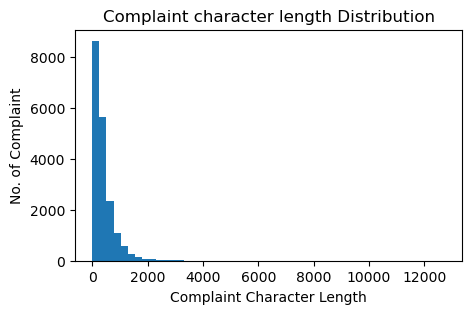

In [26]:
#Plotting character length

plt.figure(figsize=(5,3))
text_len=[len(x) for x in df_new['Lemmatized_Complaint_']]
plt.hist(text_len, bins=50)
plt.title("Complaint character length Distribution")
plt.ylabel("No. of Complaint")
plt.xlabel("Complaint Character Length")

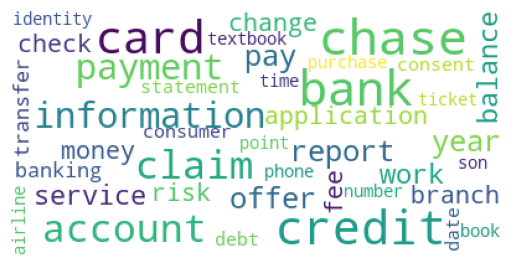

In [27]:
#Word Cloud

from wordcloud import WordCloud, STOPWORDS

wordcloud= WordCloud(collocations = False, 
                     background_color = 'white', 
                     stopwords=set(STOPWORDS), 
                     max_words=40, 
                     max_font_size=40, 
                     random_state=42).generate(str(df_new['Lemmatized_Complaint_']))

fig=plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
#Looking at unigrams, bigrams and trigrams

def top_n_unigrams(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_unigrams(df_new['Lemmatized_Complaint_'].values.astype('U'), 50)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [29]:
df2.head()

,unigram,count
0,chase,40034
1,account,38258
2,credit,28514
3,bank,26958
4,card,20536


In [30]:
def top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_bigram(df_new['Lemmatized_Complaint_'].values.astype('U'), 30)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

In [31]:
df3.head()

,bigram,count
0,credit card,9869
1,chase bank,4100
2,credit report,3553
3,customer service,2744
4,bank account,2463


In [32]:
def top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_trigram(df_new['Lemmatized_Complaint_'].values.astype('U'), 30)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [33]:
df4.head()

,trigram,count
0,chase credit card,1404
1,credit card company,771
2,credit card account,763
3,credit card chase,496
4,credit card credit,457


## NMF 

##TF-IDF -ignore terms that appear in more than 95% of the complaints and ignore terms that appear in less than 2 complaints

In [34]:
#TF-IDF

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [35]:
#Document Term matrix

doc_term_matrix = tfidf.fit_transform(df_new['Lemmatized_Complaint_'])

In [36]:
# Use Gensim's NMF to get the best number of topics via coherence score

texts = df_new['Lemmatized_Complaint_']
dataset = [d.split() for d in texts]

# In gensim - dictionary is a mapping between words and their integer id

dictionary = Dictionary(dataset)

# Remove extremes to limit count of features

dictionary.filter_extremes(no_below=3,no_above=0.85,keep_n=5000)

# Create BOW format (list of (token_id, token_count))

corpus = [dictionary.doc2bow(text) for text in dataset]

# Create list of the topic numbers to try

topic_nums = list(np.arange(5, 10, 1))

# Run the nmf model and calculate the coherence score for each number of topics

coherence_scores = []

for num in topic_nums:
    nmf = Nmf(corpus=corpus, num_topics=num, id2word=dictionary, chunksize=2000, passes=5,kappa=.1, minimum_probability=0.01, 
              w_max_iter=300, w_stop_condition=0.0001, h_max_iter=100, h_stop_condition=0.001, eval_every=10, normalize=True, random_state=42)
# Run the coherence model to get the score
    cm = CoherenceModel(model=nmf,texts=texts,dictionary=dictionary,coherence='c_v')
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score

scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

5


In [37]:
#Choosing best number of topics as n_component

nmf_model = NMF(n_components=5,random_state=42)

In [38]:
#Fitting the NMF model

nmf_model.fit(doc_term_matrix)
len(tfidf.get_feature_names())

6773

In [39]:
#Print the top word of a sample component

single_topic = nmf_model.components_[0]
single_topic.argsort()
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

branch
number
day
fund
deposit
chase
check
money
bank
account


In [40]:
#Top 15 words for each topic

for index,topic in enumerate(nmf_model.components_):
    print(f'TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

TOP 15 WORDS FOR TOPIC #0
['customer', 'transfer', 'tell', 'business', 'transaction', 'branch', 'number', 'day', 'fund', 'deposit', 'chase', 'check', 'money', 'bank', 'account']


TOP 15 WORDS FOR TOPIC #1
['reporting', 'application', 'year', 'letter', 'limit', 'debt', 'information', 'score', 'company', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


TOP 15 WORDS FOR TOPIC #2
['bank', 'document', 'foreclosure', 'sale', 'house', 'time', 'letter', 'rate', 'year', 'property', 'modification', 'chase', 'home', 'mortgage', 'loan']


TOP 15 WORDS FOR TOPIC #3
['company', 'statement', 'time', 'refund', 'service', 'merchant', 'claim', 'fraud', 'purchase', 'dispute', 'chase', 'fee', 'transaction', 'card', 'charge']


TOP 15 WORDS FOR TOPIC #4
['year', 'credit', 'chase', 'car', 'date', 'mortgage', 'time', 'auto', 'day', 'fee', 'statement', 'pay', 'balance', 'month', 'payment']




In [41]:
#Best topic for each complaint

topic_results = nmf_model.transform(doc_term_matrix)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([0, 0, 1, ..., 3, 3, 4], dtype=int64)

In [42]:
#Creating new Topic column assigning complaints with topic number

df_new['Topic'] = topic_results.argmax(axis=1)

In [43]:
df_new.head()

,Category,Sub_Category,Complaint,Lemmatized_Complaint,Lemmatized_Complaint_,Topic
1,Debt collection,Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account thanks in advance for your help,good morning name I appreciate could help I put stop chase bank cardmember service I write chase ask debt verification send I statement acceptable I ask bank validate debt instead I receive mail every month attempt collect debt I right know information consumer chase account thank advance help,morning name chase bank service debt verification statement bank debt mail month attempt debt information consumer chase account advance help,0
2,Credit card or prepaid card,General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,I upgrade card tell agent upgrade anniversary date would change turn agent give I wrong information order upgrade account change anniversary date without consent recording agent mislead I,anniversary date information order upgrade account change date consent mislead,0
10,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,1
11,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on...,try book ticket I come across offer apply towards ticket I apply reward card I put information offer within less minute notify via screen decision could make I immediately contact refer chase bank I immediately contact chase bank within get notification screen I tell chase representative I speak application deny could state I ask information offer explain even I approve credit offer gets apply first account statement could use purchase ticket I explicitly tell I glad I got deny I absolutely long interested account I ask application withdraw representative oblige happen later put application notwithstanding explicit request proceed application contrary I tell chase representative chase fact go ahe

In [44]:
#Topic names and Topics

Topic_names = {0:"Banking services",1:"Cards", 2:"Others",3:"Fraudalent Reporting",4:"Loans"}

In [45]:
#Map Topics with Topic Names

df_new['Topic'] = df_new['Topic'].map(Topic_names)

In [46]:
df_new

,Category,Sub_Category,Complaint,Lemmatized_Complaint,Lemmatized_Complaint_,Topic
1,Debt collection,Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account thanks in advance for your help,good morning name I appreciate could help I put stop chase bank cardmember service I write chase ask debt verification send I statement acceptable I ask bank validate debt instead I receive mail every month attempt collect debt I right know information consumer chase account thank advance help,morning name chase bank service debt verification statement bank debt mail month attempt debt information consumer chase account advance help,Banking services
2,Credit card or prepaid card,General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,I upgrade card tell agent upgrade anniversary date would change turn agent give I wrong information order upgrade account change anniversary date without consent recording agent mislead I,anniversary date information order upgrade account change date consent mislead,Banking services
10,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,Cards
11,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on...,try book ticket I come across offer apply towards ticket I apply reward card I put information offer within less minute notify via screen decision could make I immediately contact refer chase bank I immediately contact chase bank within get notification screen I tell chase representative I speak application deny could state I ask information offer explain even I approve credit offer gets apply first account statement could use purchase ticket I explicitly tell I glad I got deny I absolutely long interested account I ask application withdraw representative oblige happen later put application notwithstanding explicit request proceed application contrary I tell chas

## Supervised model to classify any new complaints under relevant Topics.

In [47]:
#Converting topic names into topic numbers for modelling

Topic_names = {"Banking services": 0, "Cards": 1, "Loans": 2, "Fraudalent Reporting": 3, "Others": 4}
df_new['Topic'].replace(Topic_names, inplace=True)

In [48]:
df_new

,Category,Sub_Category,Complaint,Lemmatized_Complaint,Lemmatized_Complaint_,Topic
1,Debt collection,Credit card debt,good morning my name is and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account thanks in advance for your help,good morning name I appreciate could help I put stop chase bank cardmember service I write chase ask debt verification send I statement acceptable I ask bank validate debt instead I receive mail every month attempt collect debt I right know information consumer chase account thank advance help,morning name chase bank service debt verification statement bank debt mail month attempt debt information consumer chase account advance help,0
2,Credit card or prepaid card,General-purpose credit card or charge card,i upgraded my card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account changed my anniversary date from to without my consent has the recording of the agent who was misled me,I upgrade card tell agent upgrade anniversary date would change turn agent give I wrong information order upgrade account change anniversary date without consent recording agent mislead I,anniversary date information order upgrade account change date consent mislead,0
10,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,1
11,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,on while trying to book a ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on...,try book ticket I come across offer apply towards ticket I apply reward card I put information offer within less minute notify via screen decision could make I immediately contact refer chase bank I immediately contact chase bank within get notification screen I tell chase representative I speak application deny could state I ask information offer explain even I approve credit offer gets apply first account statement could use purchase ticket I explicitly tell I glad I got deny I absolutely long interested account I ask application withdraw representative oblige happen later put application notwithstanding explicit request proceed application contrary I tell chase representative chase fact go ahe

In [49]:
#Training dataset

train_data=df_new[["Lemmatized_Complaint_","Topic"]]

In [50]:
train_data

,Lemmatized_Complaint_,Topic
1,morning name chase bank service debt verification statement bank debt mail month attempt debt information consumer chase account advance help,0
2,anniversary date information order upgrade account change date consent mislead,0
10,card report application submit identity consent service credit identity applicant,1
11,book ticket offer apply ticket card information offer notify decision bank bank notification screen representative application deny state information offer credit offer account statement purchase ticket account representative oblige request proceed application chase fact credit account report credit report chase information credit report application error,1
14,son account fund bank account money son check money bank pay money son call time check owner country time date check number claim number chase,0
...,...,...
78301,husband pass bank pay rent car insurance bring phone hour bank balance daughter phone speaker money bank bank rent everything ok bank everything fine anything card change chase bank check security change bank income nothing team nothing branch branch computer figure account branch zip stress year constellation bank branch clue get anything amount please helpsince security thank year deal bank inaccuracy citizen distress help,0
78303,chase card customer decade offer solicitation credit card chase bonus airline hotel point card fee year month payment chase card send credit charge fee account credit point airline hotel credit enrollment credit airline charge,1
78309,wednesday visa credit card provider claim purchase protection benefit school textbook year daughter school book damage water bottle backpack break assure instruct claim file claim request paperwork copy credit card statement copy receipt evidence damage book catagorie item cover claim claim insurance provider review information contact business day step process email claim submission claim look examiner day day claim information contradictory information send work adjuster connect return file update textbook life revision course end course end textbook purchase tell claim time end state claim status deny borderline fraudulent,3
78310,pay risk consumer chase bank year trust merchant merchant refuse answer inquiry shut communication look face brand medium consent perform research phone number information pi merchant account title holder perpetuate cycle fraud voip use bank tell report recourse matter place address issue app verbiage point position chase banking service entitlement customer service protection protocol chase link place consumer risk service flag concern chase minimum risk banking app stand report correspond authority identity inform neighbor work television news network risk use banking fraud banking mogul chase action extent,3


In [51]:
#Using Count Vectorizer to get Vector Count

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data['Lemmatized_Complaint_'])

#Save the word vector

pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [52]:
#Transforming the word vector into tf-idf

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#Saving tf-idf
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

In [53]:
# Multinomial Naive Bayes for classification

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, train_data.Topic, test_size=0.20, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)

#Saving MNB model
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [54]:
#Target categories

target_cat = ["Banking services","Cards","Others","Fraudalent Reporting","Loans"]

In [55]:
#Testing the Multinomial Naive Bayes with a test data

docs_test = "I want to know who services my mortgage, who owns it and who has the original loan documents"
docs_test = [docs_test]

#Loading the saved model
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_test)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(target_cat[predicted[0]])

#We can see that this was able to capture the correct target label for the test document

Loans


In [56]:
#Prediction using test set- X test

predicted = loaded_model.predict(X_test)

In [57]:
#Confusion Matrix for MNB

confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)
print("\n")

#Model scores

print(classification_report(y_test, predicted, target_names=target_cat))

#We can clearly see the precision, recall and F1 score is too low for some categories
#lets try another model

[[959  21   0  23   6]
 [ 89 581   0 101  15]
 [127  92  39  47 104]
 [177  30   2 621   9]
 [ 67  30   0   8 645]]


                      precision    recall  f1-score   support

    Banking services       0.68      0.95      0.79      1009
               Cards       0.77      0.74      0.75       786
              Others       0.95      0.10      0.17       409
Fraudalent Reporting       0.78      0.74      0.76       839
               Loans       0.83      0.86      0.84       750

            accuracy                           0.75      3793
           macro avg       0.80      0.68      0.66      3793
        weighted avg       0.78      0.75      0.72      3793



In [58]:
#Logistic Regression Model

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, train_data.Topic, test_size=0.25, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

#Saving the LR model
pickle.dump(clf, open("logreg_model.pkl", "wb"))

In [59]:
#Testing the Logistic Regression model with a test data

docs_test = "I want to know who services my mortgage, who owns it and who has the original loan documents"
docs_test = [docs_test]

#Loading saved Models
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("logreg_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_test)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(target_cat[predicted[0]])

#We can see that this was able to capture the correct target label for the test document

Loans


In [60]:
#Another complaint to test

docs_test="want to check offers on my account"
docs_test = [docs_test]
X_new_counts = loaded_vec.transform(docs_test)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(target_cat[predicted[0]])

Banking services


In [61]:
#Prediction using test set- X test

predicted = loaded_model.predict(X_test)

In [62]:
#Confusion matrix to evaluate model

confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)
print("\n")

#Model scores

print(classification_report(y_test, predicted, target_names=target_cat))

#We can clearly see the precision, recall and F1 score are good for LR

[[1255    4    2   11    9]
 [  11  966    1   18    9]
 [  14    6  463    4   11]
 [  29    5    3  997    8]
 [  10    3    5    8  889]]


                      precision    recall  f1-score   support

    Banking services       0.95      0.98      0.97      1281
               Cards       0.98      0.96      0.97      1005
              Others       0.98      0.93      0.95       498
Fraudalent Reporting       0.96      0.96      0.96      1042
               Loans       0.96      0.97      0.97       915

            accuracy                           0.96      4741
           macro avg       0.97      0.96      0.96      4741
        weighted avg       0.96      0.96      0.96      4741



We can clearly see that Logistic regression is doing a fair job classifying the complaints into correct categories. The precsion and recall values for all the categories are above 93%. The accuracy and weighted average accuracy is also 96%. If we want we can also try with few more models like decision tree and random forest. 